This is Mason's Notebook for the Winter Project 

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


In [2]:
html_text = requests.get('https://housing.ucdavis.edu/dining/menus/dining-commons/tercero/').text

In [3]:
soup = BeautifulSoup(html_text, 'lxml')
foodList= []
for EachPart in soup.select('li[class*= "trigger"]' ):
    foodList.append(EachPart.get_text().partition('\n')[0])

In [4]:
len(foodList)

403

In [5]:
soup.find('ul', class_='nutrition').find('p').get_text()


'Traditional pork sausage with a touch of fennel and black pepper'

In [6]:
descriptionList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    descriptionList.append(EachPart.find('p').get_text().partition('\n')[0])

In [7]:
caloriesList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    for i in EachPart.select('p:nth-child(4)'):
        caloriesList.append(i.text[2:])

In [8]:
len(caloriesList)

403

In [9]:
fatList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    for i in EachPart.select('p:nth-child(6)'):
        fatList.append(i.text[2:])

In [10]:
carbList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    for i in EachPart.select('p:nth-child(8)'):
        carbList.append(i.text[2:])

In [11]:
proteinList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    for i in EachPart.select('p:nth-child(10)'):
        proteinList.append((i.text[2:]))

In [12]:
allergensList = []
for EachPart in soup.select('ul[class= "nutrition"]'):
    if(EachPart.select('p:nth-child(12)')):
        for i in EachPart.select('p:nth-child(12)'):
            allergensList.append(i.text[0:])
    else:
        allergensList.append(None)
# there is no ": " before the text, hence start from 0th char

In [13]:
len(allergensList)

403

In [14]:
ingredientsList = []
for EachPart in soup.select('ul[class= "nutrition"]'):
    if(EachPart.select('p:nth-child(14)')):
        for i in EachPart.select('p:nth-child(14)'):
            ingredientsList.append(i.text[0:])
    else:
        ingredientsList.append(None)

In [15]:
# dayList = []
# for EachPart in soup.select()

In [16]:
# divs = soup.find_all('h4')
# print (divs)

In [17]:
mealTimeList = []
for EachPart in soup.select('u1[class = "tabsList"]'):
    if(EachPart.select('h:nth-child(1)')):
        for i in EachPart.select('h:nth-child(1)'):
            mealTimeList.append(i.text[:])
    else:
        mealTimeList.append(None)

In [18]:
servingList = []
for EachPart in soup.select('ul[class= "nutrition"]' ):
    for i in EachPart.select('p:nth-child(2)'):
        servingList.append(i.text[2:])

In [19]:
def stringtoFloat(x):
    for i in range(len(x)):
        if x[i] == 'N/A':
            x[i] = np.nan
        else:
            x[i]=float(x[i])
    return x

In [20]:
caloriesList = stringtoFloat(caloriesList)
fatList = stringtoFloat(fatList)
carbList = stringtoFloat(carbList)
proteinList = stringtoFloat(proteinList)

In [21]:
d = {'Food':foodList, 'Servings':servingList, 'Description':descriptionList, 'Ingredients':ingredientsList, 'Calories':caloriesList, 'Fat':fatList, 'Protein':proteinList, 'Carbs':carbList, 'Allergens':allergensList}
Tercero = pd.DataFrame(d)


In [22]:
Tercero

,Food,Servings,Description,Ingredients,Calories,Fat,Protein,Carbs,Allergens
0,Pork Link Sausage,3 oz,Traditional pork sausage with a touch of fenne...,None,335.44,32.15,8.38,1.40,None
1,Scrambled Eggs,3 oz,Softly scrambled cage-free eggs,"Cage-free eggs, canola oil",129.10,8.77,10.89,0.00,Egg
2,Sticky Rice,1/2 cup (3 oz),Steamed white calrose rice,None,161.70,0.26,2.97,35.64,None
3,Scrambled Egg Whites,3.5 oz,: 3.5 oz,"Cage-free egg whites, canola oil",95.10,5.18,10.15,0.78,Egg
4,Tofu Scramble,3 oz,"Scrambled firm tofu cooked with onions, bell p...","Organic firm tofu (contains soy), yellow onion...",72.17,4.54,5.95,3.36,Soy/Gluten/Wheat
...,...,...,...,...,...,...,...,...,...
398,Pisto Spread,2 Tablespoons,"Made with tomatoes, eggplant, and bell peppers",None,17.94,1.16,0.29,1.83,None
399,Tomato Phesto with Walnuts,2 Tablespoons,Tangy tomato sauce featuring Russel Ranch toma...,"Canola/olive oil blend, house-made halal roast...",79.18,8.06,0.59,2.31,Tree Nuts
400,Toffee Sticky Pudding Cake,1 SV,May contain peanuts and tree nuts,"Toffee sauce (glucose, cream, sugar, salted bu...",241.92,10.08,3.03,35.28,Dairy/Egg/Gluten/Soy/Wheat
401,Chocolate Chip Cookie,1 EA,"Produced in a facility that also uses dairy, e...","Enriched bleached flour (wheat flour, niacin, ...",400.00,19.00,4.00,55.00,Alcohol [vanilla extract]/Dairy/Egg/Gluten/Soy...


In [23]:
# Calorie Calculator
# calorieCalc = Tercero.groupby(['Food', 'Calories'])
# calorieCalc

In [24]:
Tercero.to_csv('TerceroMeal.csv')

In [25]:
Tercero['Calories'].idxmax()

296

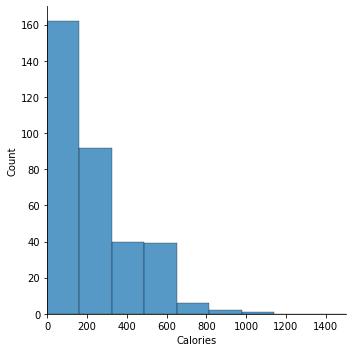

In [30]:
calorieDist = sns.displot(Tercero['Calories'], kde=False, bins = 100)
calorieDist.set(xlim=(0, 1500))
plt.show()

# add: hue = 'Time'  | to differentiate meals between breakfast, lunch, and dinner

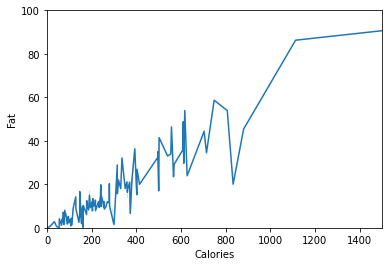

In [34]:
fatVsCalories = sns.lineplot(x=Tercero['Calories'], y=Tercero['Fat'], data = Tercero)
fatVsCalories.set(xlim=(0, 1500) , ylim=(0,100))
plt.show()

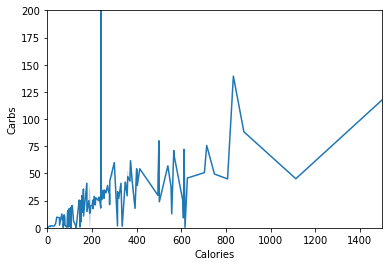

In [39]:
carbsVsCalories = sns.lineplot(x=Tercero['Calories'], y=Tercero['Carbs'], data = Tercero)
carbsVsCalories.set(xlim=(0, 1500) , ylim=(0,200))
plt.show()

In [54]:
def calc_ratio (x, y):
    if y <= 0:
        y = None
        return None
    return (x / y)

# apply_CalCarbs
# Tercero


In [60]:
apply_CalCarbs = Tercero.apply (
    lambda x: calc_ratio(x['Carbs'], x['Calories']), axis=1)
Tercero['CalCarbs'] = apply_CalCarbs

apply_CalFat = Tercero.apply (
    lambda x: calc_ratio(x['Fat'], x['Calories']), axis=1)
Tercero['CalFat'] = apply_CalFat

apply_CalPro = Tercero.apply (
    lambda x: calc_ratio(x['Protein'], x['Calories']), axis=1)
Tercero['CalPro'] = apply_CalPro


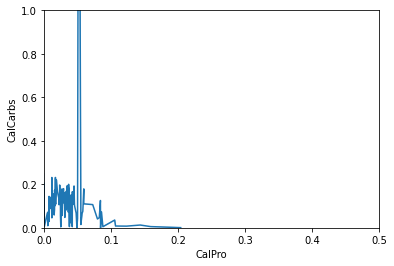

In [63]:
CalCarbsGraph = sns.lineplot(x=Tercero['CalPro'], y=Tercero['CalCarbs'], data = Tercero)
CalCarbsGraph.set(xlim=(0, 0.5) , ylim=(0,1))
plt.show()